In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_log_error

In [2]:
train = pd.read_csv('data/train_merged.csv', parse_dates=['date'], low_memory=False)
test = pd.read_csv('data/test_merged.csv', parse_dates=['date'], low_memory=False)

In [3]:
train.earthquake.fillna('', inplace=True)
train.event_name.fillna('', inplace=True)
train.national_holiday.fillna('', inplace=True)
train.regional_holiday.fillna('', inplace=True)
train.local_holiday.fillna('', inplace=True)
train.work_day_name.fillna('', inplace=True)

test.earthquake.fillna('', inplace=True)
test.event_name.fillna('', inplace=True)
test.national_holiday.fillna('', inplace=True)
test.regional_holiday.fillna('', inplace=True)
test.local_holiday.fillna('', inplace=True)
test.work_day_name.fillna('', inplace=True)

In [4]:
train.drop('transactions', axis=1, inplace=True)
test.drop('transactions', axis=1, inplace=True)

In [5]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,earthquake,event_name,national_holiday,regional_holiday,local_holiday,year,month,day,day_of_week,payday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,,,Primer dia del ano,,,2013,1,1,1,False


In [6]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,oil_price,...,earthquake,event_name,national_holiday,regional_holiday,local_holiday,year,month,day,day_of_week,payday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,...,,,,,,2017,8,16,2,False


In [7]:
full_data = pd.concat([train, test])

In [8]:
cat_features = [
    'family', 'store_nbr', 'city', 'state', 'cluster',
    'earthquake', 'event_name', 'national_holiday', 'regional_holiday', 'local_holiday',
    'payday', 'type', 'work_day_name',
]
full_data_encoded = pd.get_dummies(full_data, columns=cat_features)

In [9]:
test_border_date = test.date.unique()[0]
valid_border_date = train.date.unique()[-31]
train_data = full_data_encoded[full_data_encoded.date < valid_border_date]
valid_data = full_data_encoded[(full_data_encoded.date >= valid_border_date) & (full_data_encoded.date < test_border_date)]
test_data = full_data_encoded[full_data_encoded.date >= test_border_date]

In [10]:
train_data.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_B,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano
0,0,2013-01-01,0.0,0,93.14,2013,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,3,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,4,2013-01-01,0.0,0,93.14,2013,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [11]:
valid_data.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_B,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano
54549,2945646,2017-07-16,2.0,0,46.53,2017,7,16,6,1,...,0,0,1,0,1,0,0,0,0,0
54550,2945647,2017-07-16,0.0,0,46.53,2017,7,16,6,0,...,0,0,1,0,1,0,0,0,0,0
54551,2945648,2017-07-16,2.0,0,46.53,2017,7,16,6,0,...,0,0,1,0,1,0,0,0,0,0
54552,2945649,2017-07-16,1079.0,34,46.53,2017,7,16,6,0,...,0,0,1,0,1,0,0,0,0,0
54553,2945650,2017-07-16,0.0,0,46.53,2017,7,16,6,0,...,0,0,1,0,1,0,0,0,0,0


In [12]:
test_data.head()

,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,family_AUTOMOTIVE,...,type_B,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano
0,3000888,2017-08-16,NaN,0,46.8,2017,8,16,2,1,...,0,0,1,0,1,0,0,0,0,0
1,3000889,2017-08-16,NaN,0,46.8,2017,8,16,2,0,...,0,0,1,0,1,0,0,0,0,0
2,3000890,2017-08-16,NaN,2,46.8,2017,8,16,2,0,...,0,0,1,0,1,0,0,0,0,0
3,3000891,2017-08-16,NaN,20,46.8,2017,8,16,2,0,...,0,0,1,0,1,0,0,0,0,0
4,3000892,2017-08-16,NaN,0,46.8,2017,8,16,2,0,...,0,0,1,0,1,0,0,0,0,0


In [13]:
train_dates = train_data.date.unique()
valid_dates = valid_data.date.unique()
test_dates = test_data.date.unique()
print(f'Train from {train_dates[0]} to {train_dates[-1]}')
print(f'Valid from {valid_dates[0]} to {valid_dates[-1]}')
print(f'Test from {test_dates[0]} to {test_dates[-1]}')

Train from 2013-01-01T00:00:00.000000000 to 2017-07-15T00:00:00.000000000
Valid from 2017-07-16T00:00:00.000000000 to 2017-08-15T00:00:00.000000000
Test from 2017-08-16T00:00:00.000000000 to 2017-08-31T00:00:00.000000000


In [14]:
y_train = train_data[['sales']].values
y_valid = valid_data[['sales']].values

X_train = train_data.drop(['id', 'sales', 'year', 'date'], axis=1)
X_valid = valid_data.drop(['id', 'sales', 'year', 'date'], axis=1)

X_test = test_data.drop(['id', 'date', 'year', 'sales'], axis=1)

In [15]:
X_test.head()

,onpromotion,oil_price,month,day,day_of_week,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,type_B,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano
0,0,46.8,8,16,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,46.8,8,16,2,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2,46.8,8,16,2,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,20,46.8,8,16,2,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0,46.8,8,16,2,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [16]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train.values)

In [49]:
model = keras.Sequential([
    normalizer,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1),
])
model.compile(
    loss='mean_squared_logarithmic_error',
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [50]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 259)              519       
 n)                                                              
                                                                 
 dense_42 (Dense)            (None, 256)               66560     
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                      

In [51]:
%%time
history = model.fit(
    X_train.values,
    y_train,
    batch_size=30000,
    validation_data=(X_valid, y_valid),
    epochs=10,
)

Epoch 1/10
99/99 [==============================] - 15s 142ms/step - loss: 4.5234 - val_loss: 1.7082
Epoch 2/10
99/99 [==============================] - 14s 137ms/step - loss: 1.2610 - val_loss: 1.0331
Epoch 3/10
99/99 [==============================] - 14s 139ms/step - loss: 0.9896 - val_loss: 0.8339
Epoch 4/10
99/99 [==============================] - 14s 140ms/step - loss: 0.8948 - val_loss: 0.7410
Epoch 5/10
99/99 [==============================] - 13s 136ms/step - loss: 0.8381 - val_loss: 0.7050
Epoch 6/10
99/99 [==============================] - 14s 137ms/step - loss: 0.7958 - val_loss: 0.6409
Epoch 7/10
99/99 [==============================] - 14s 139ms/step - loss: 0.7634 - val_loss: 0.5951
Epoch 8/10
99/99 [==============================] - 14s 138ms/step - loss: 0.7345 - val_loss: 0.5781
Epoch 9/10
99/99 [==============================] - 14s 138ms/step - loss: 0.7088 - val_loss: 0.5881
Epoch 10/10
99/99 [==============================] - 14s 140ms/step - loss: 0.6866 - val_lo

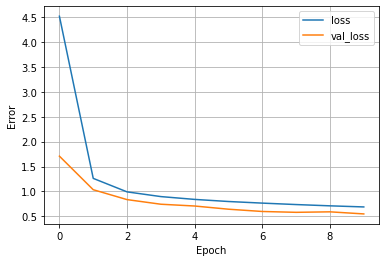

In [52]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [56]:
y_valid_pred = pd.Series(np.squeeze(model.predict(X_valid))).map(lambda x: max(x, 0))
mean_squared_log_error(y_valid, y_valid_pred)

0.5461466518330349

In [59]:
valid_pred = valid_data.copy().reset_index()
valid_pred['sales_pred'] = y_valid_pred
valid_pred.head()

,index,id,date,sales,onpromotion,oil_price,year,month,day,day_of_week,...,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano,sales_pred
0,54549,2945646,2017-07-16,2.0,0,46.53,2017,7,16,6,...,0,1,0,1,0,0,0,0,0,2.420721
1,54550,2945647,2017-07-16,0.0,0,46.53,2017,7,16,6,...,0,1,0,1,0,0,0,0,0,0.024278
2,54551,2945648,2017-07-16,2.0,0,46.53,2017,7,16,6,...,0,1,0,1,0,0,0,0,0,1.828948
3,54552,2945649,2017-07-16,1079.0,34,46.53,2017,7,16,6,...,0,1,0,1,0,0,0,0,0,2480.333496
4,54553,2945650,2017-07-16,0.0,0,46.53,2017,7,16,6,...,0,1,0,1,0,0,0,0,0,0.023321


In [60]:
y_test_pred = pd.Series(np.squeeze(model.predict(X_test))).map(lambda x: max(x, 0))
pred = X_test.copy()
pred['sales'] = y_test_pred
pred.head()

,onpromotion,oil_price,month,day,day_of_week,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,type_C,type_D,type_E,work_day_name_,work_day_name_Recupero Puente Dia de Difuntos,work_day_name_Recupero Puente Navidad,work_day_name_Recupero Puente Primer dia del ano,work_day_name_Recupero puente Navidad,work_day_name_Recupero puente primer dia del ano,sales
0,0,46.8,8,16,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,2.172394
1,0,46.8,8,16,2,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0.020273
2,2,46.8,8,16,2,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,2.328211
3,20,46.8,8,16,2,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,2200.341797
4,0,46.8,8,16,2,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0.016258


In [61]:
sub = test[['id']].copy()
sub['sales'] = pred.sales
sub.head()

,id,sales
0,3000888,2.172394
1,3000889,0.020273
2,3000890,2.328211
3,3000891,2200.341797
4,3000892,0.016258


In [62]:
sub.to_csv('data/submission_nn.csv', index=False)